# Data visualization of the final dataframe

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_parquet("../data/final_cocktail_dataset.parquet")
df.head(n=2).T

,0,1
id,11000,11001
name,Mojito,Old Fashioned
ingredients,"[{'alcohol': 1, 'createdAt': '2024-08-18T19:01...","[{'alcohol': 0, 'createdAt': '2024-08-18T19:03..."
ordinaryDrink,0,0
glassChampagneFlute,0.0,0.0
glassCocktailGlass,0.0,0.0
glassCollinsGlass,0.0,0.0
glassHighballGlass,1.0,0.0
glassOld-fashionedGlass,0.0,1.0
glassOther,0.0,0.0


#### Heatmap to show corealtions i=between distinct columns

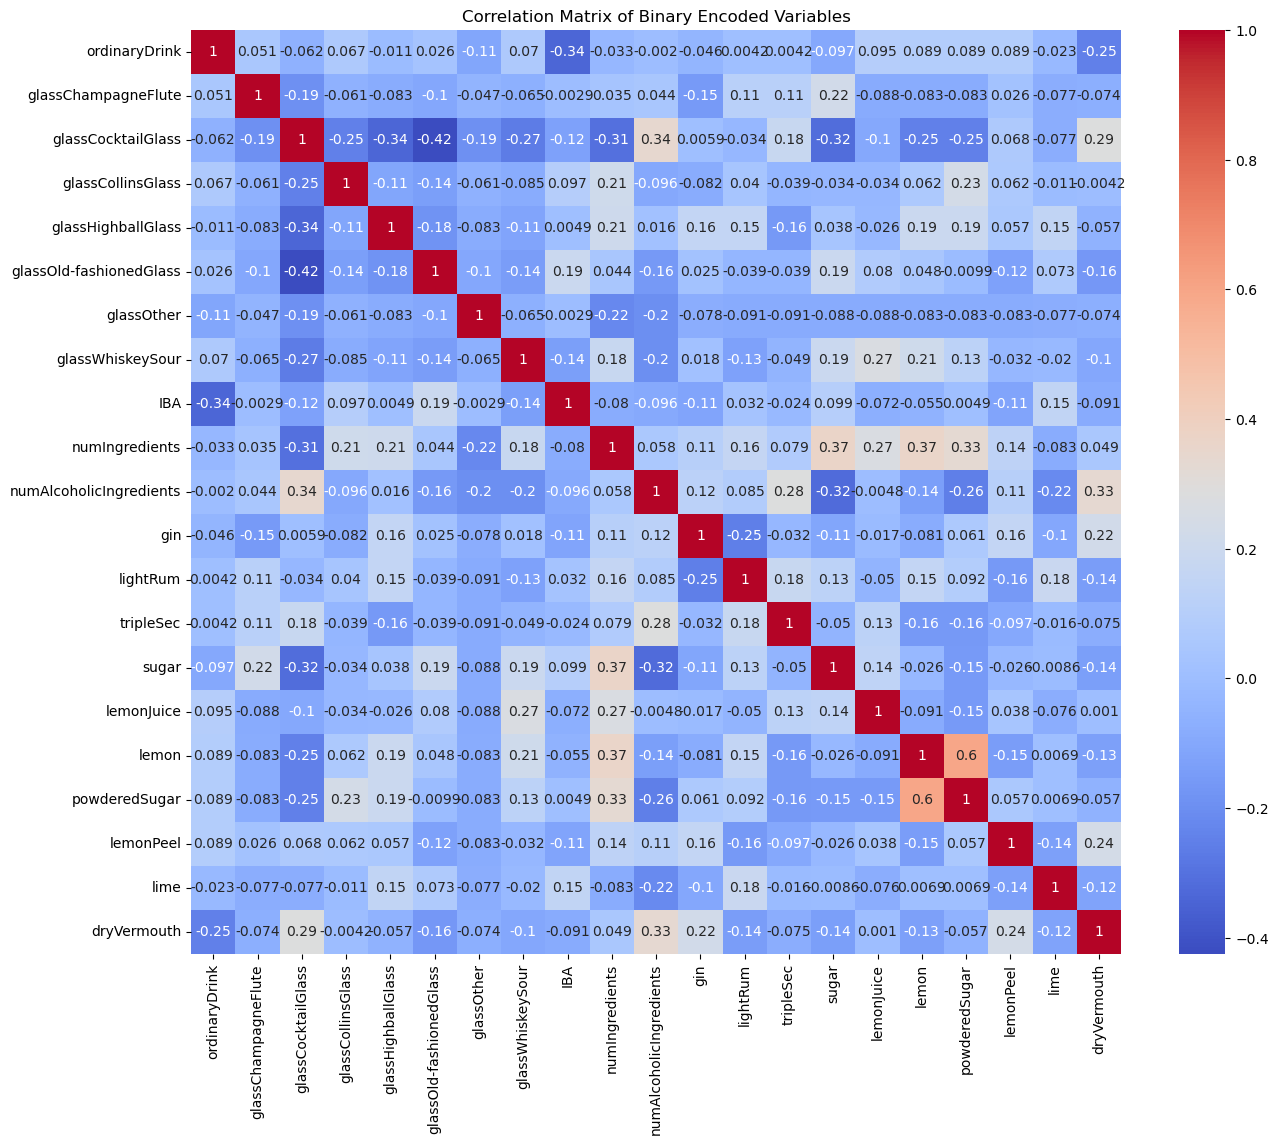

In [5]:
numeric_and_bool_df = df.select_dtypes(include=["number", "bool"])
numeric_and_bool_df.drop("id", axis=1, inplace=True)

plt.figure(figsize=(15, 12))
sns.heatmap(numeric_and_bool_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Binary Encoded Variables")
plt.show()

#### Boxplot of numeric columns

<Axes: ylabel='numIngredients'>

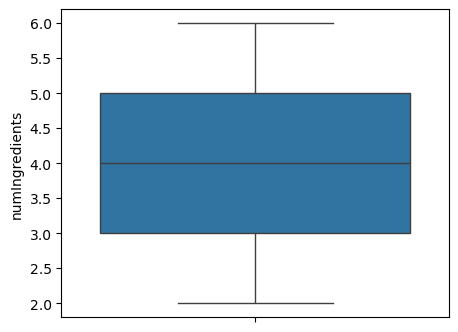

In [8]:
plt.figure(figsize=(5, 4))
sns.boxplot(y="numIngredients", data=df)

- every cocktail has between 2-6 ingredietns
- the distribution is symetrical and focused around the middle value
- there are no outliers.

<Axes: ylabel='numAlcoholicIngredients'>

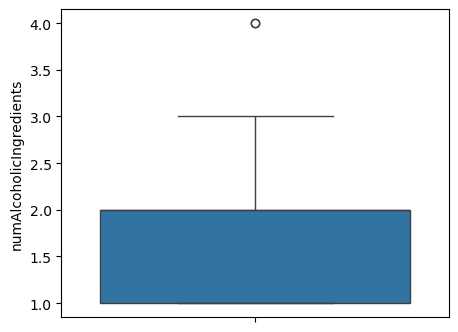

In [10]:
plt.figure(figsize=(5, 4))
sns.boxplot(y="numAlcoholicIngredients", data=df)

- 75% of cocktails have either 1 or 2 alcoholic ingredients
- maximum value is 3 but for rare cocktails there are 4 alcoholic ingredients

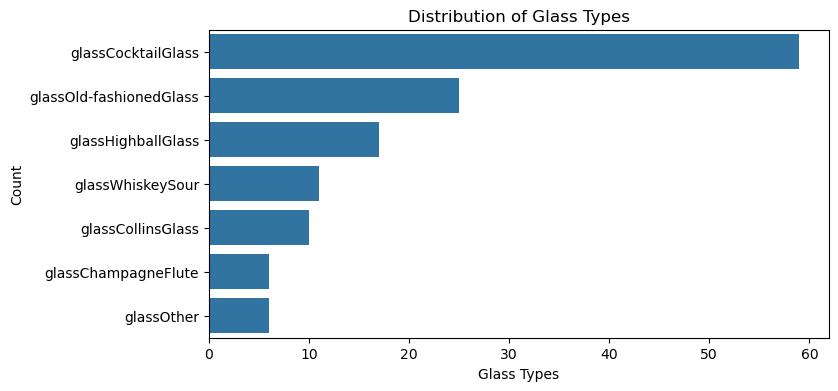

In [12]:
glass_columns = df.filter(like='glass').columns
glass_sums = df[glass_columns].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 4))
sns.barplot(x=glass_sums.values, y=glass_sums.index)
plt.title('Distribution of Glass Types')
plt.xlabel('Glass Types')
plt.ylabel('Count')
plt.show()

CocktailsGlass is the most common glas type and it is used for over a half of all the cocktails

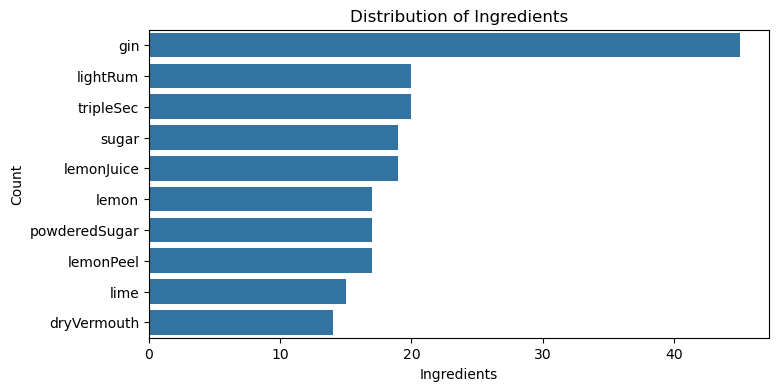

In [14]:
ingredients_columns = df.columns[-10:]
ingredients_sums = df[ingredients_columns].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 4))
sns.barplot(x=ingredients_sums.values, y=ingredients_sums.index)
plt.title('Distribution of Ingredients')
plt.xlabel('Ingredients')
plt.ylabel('Count')

plt.show()